# **LIBRARIES**

In [88]:
import pandas as peacepd
import numpy as peacenp
import matplotlib.pyplot as peaceplt
import seaborn as peacesn
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.linear_model import LogisticRegression, LassoCV, LinearRegression
from sklearn.metrics import accuracy_score, make_scorer, mean_squared_error, r2_score
from prettytable import PrettyTable
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.spatial.distance import mahalanobis
from scipy.linalg import inv

# **QUESTION 2 - CLASSIFICATION USING TREES**

Step 1: Loading the Titanic Dataset

In [2]:
# Read the Dataset
df_titanic = peacepd.read_csv('titanic3.csv')
df_titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
df_titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [4]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


Step 2: Data Preprocessing

In [5]:
# Select relevant features and the target
predictors = [['pclass', 'sex', 'age']]
target = ['survived']

In [6]:
# Create a dataframe combining the selected columns
df_useful = df_titanic[predictors[0] + target]

In [7]:
# Impute the missing values in the age column with the mean
age_mean = df_useful['age'].mean()
df_useful['age'].fillna(age_mean, inplace=True)

<ipython-input-7-03fe6a703286>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_useful['age'].fillna(age_mean, inplace=True)
<ipython-input-7-03fe6a703286>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_useful['age'].fillna(age_mean, inplace=True)


In [8]:
df_useful['age']

,age
0,29.000000
1,0.920000
2,2.000000
3,30.000000
4,25.000000
...,...
1304,14.500000
1305,29.881138
1306,26.500000
1307,27.000000


In [9]:
# Transform sex to numerical values where 0 is for 'male' and 1 is for 'female'
df_useful['sex'] = df_useful['sex'].map({'male': 0, 'female': 1})

<ipython-input-9-36772b76542f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_useful['sex'] = df_useful['sex'].map({'male': 0, 'female': 1})


In [10]:
df_useful['sex']

,sex
0,1
1,0
2,1
3,0
4,1
...,...
1304,1
1305,1
1306,0
1307,0


In [11]:
# Identify the predictor and dependent variables

X = df_useful[predictors[0]]
y = df_useful[target[0]]

print(X.head())
print(y.head())

   pclass  sex    age
0       1    1  29.00
1       1    0   0.92
2       1    1   2.00
3       1    0  30.00
4       1    1  25.00
0    1
1    1
2    0
3    0
4    0
Name: survived, dtype: int64


Step 3: Fit and Evaluate a Decision Tree Classifier

In [12]:
# Initialize cross-validation

cross_val = KFold(n_splits=5, shuffle=True, random_state=42)

In [13]:
# Train a decision tree classifier

decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X, y)

DecisionTreeClassifier(random_state=42)

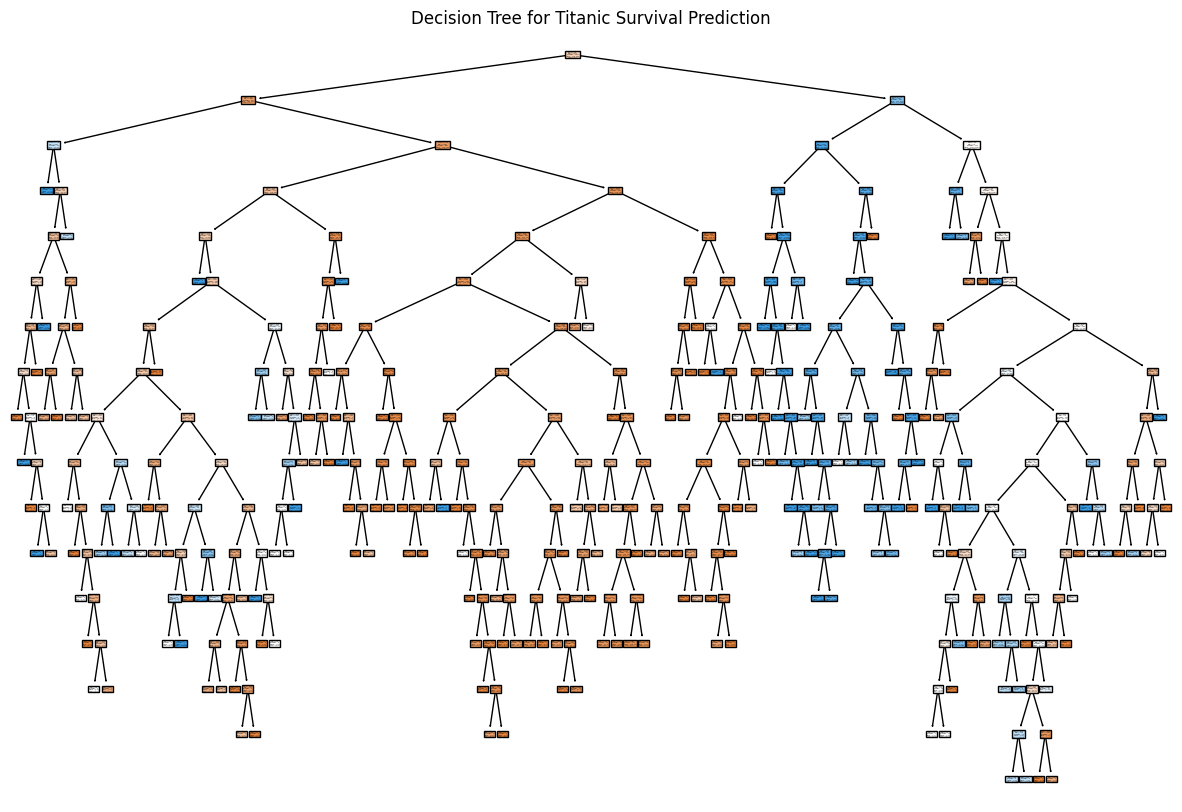

In [14]:
# Visualize the tree

peaceplt.figure(figsize=(15, 10))
plot_tree(decision_tree, feature_names=predictors[0], class_names=['Dead', 'Survived'], filled=True)
peaceplt.title('Decision Tree for Titanic Survival Prediction')
peaceplt.show()

In [15]:
# Compute in-sample misclassification error

y_pred_train = decision_tree.predict(X)
accuracy_before_pruning = accuracy_score(y, y_pred_train)
in_sample_error = 1 - accuracy_before_pruning
print(f'Accuracy before pruning: {accuracy_before_pruning:.4f}')
print(f'In-sample Misclassification Error: {in_sample_error:.4f}')

Accuracy before pruning: 0.8464
In-sample Misclassification Error: 0.1536


In [16]:
# Compute cross-validation misclassification error

cross_val_scores = cross_val_score(decision_tree, X, y, cv=cross_val, scoring='accuracy')
cross_val_error = 1 - cross_val_scores.mean()
print(f'Cross-Validation Misclassification Error: {cross_val_error:.4f}')

Cross-Validation Misclassification Error: 0.2223


Step 4: Prune the Decision Tree

In [17]:
# Compute the pruning path

pruning_path = decision_tree.cost_complexity_pruning_path(X, y)
ccp_alphas, impurities = pruning_path.ccp_alphas, pruning_path.impurities

In [18]:
# Train the multiple trees for each alpha

trees = []
for ccp_alpha in ccp_alphas:
    tree = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    tree.fit(X, y)
    trees.append(tree)

In [19]:
# Evaluate the trees using cross-validation

cross_val_scores_pruned = []
for tree in trees:
    scores = cross_val_score(tree, X, y, cv=5, scoring='accuracy')
    cross_val_scores_pruned.append(scores.mean())

In [20]:
# Identify the best alpha

best_alpha_index = cross_val_scores_pruned.index(max(cross_val_scores_pruned))
best_alpha = ccp_alphas[best_alpha_index]
print(f'Best Pruning alpha: {best_alpha}')

Best Pruning alpha: 0.0010630758327427395


In [21]:
# Train the Pruned Tree

pruned_dec_tree = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
pruned_dec_tree.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0010630758327427395, random_state=42)

In [22]:
# Evaluate the Pruned Decision Tree Performance

y_pred_pruned = pruned_dec_tree.predict(X)
accuracy_after_pruning = accuracy_score(y, y_pred_pruned)
pruned_dec_tree_error = 1 - accuracy_after_pruning
cross_val_scores_pruned = cross_val_score(pruned_dec_tree, X, y, cv=cross_val, scoring='accuracy')
cross_val_error_pruned = 1 - cross_val_scores_pruned.mean()
print(f"Pruned Decision Tree Cross-Validation Error: {cross_val_error_pruned:.4f}")
print(f'Accuracy after pruning: {accuracy_after_pruning:.4f}')
print(f'Pruned Decision Tree Misclassification Error: {pruned_dec_tree_error:.4f}')

Pruned Decision Tree Cross-Validation Error: 0.2193
Accuracy after pruning: 0.8121
Pruned Decision Tree Misclassification Error: 0.1879


Step 5: Logistic Regression

In [23]:
# Train the Logistic Regression Model

log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(X, y)

LogisticRegression(max_iter=1000, random_state=42)

In [24]:
# Evaluate Logistic Regression

y_pred_log_reg = log_reg_model.predict(X)
log_reg_accuracy = accuracy_score(y, y_pred_log_reg)
log_reg_error = 1 - log_reg_accuracy
print(f'Logistic Regression Accuracy: {log_reg_accuracy:.4f}')
print(f'Logistic Regression Test Misclassification Error: {log_reg_error:.4f}')

Logistic Regression Accuracy: 0.7853
Logistic Regression Test Misclassification Error: 0.2147


In [25]:
# Compute cross-validation score for Logistic Regression

log_reg_cross_val = cross_val_score(log_reg_model, X, y, cv=cross_val, scoring='accuracy')
log_reg_cross_val_error = 1 - log_reg_cross_val.mean()
print(f'Cross-Validation Misclassification Error for Logistic Regression: {log_reg_cross_val_error:.4f}')

Cross-Validation Misclassification Error for Logistic Regression: 0.2239


In [26]:
table = PrettyTable()

table.field_names = ["Metric", "Decision Tree", "Pruned Decision Tree", "Logistic Regression"]

table.add_row(["Accuracy", accuracy_before_pruning, accuracy_after_pruning, log_reg_accuracy])
table.add_row(["In-Sample Misclassification Error", in_sample_error, pruned_dec_tree_error, log_reg_error])
table.add_row(["Cross-Validation Misclassification Error", cross_val_error, cross_val_error_pruned, log_reg_cross_val_error])

In [27]:
# Align columns for better readability

table.align["Metric"] = "l"
table.align["Decision Tree"] = "r"
table.align["Pruned Decision Tree"] = "r"
table.align["Logistic Regression"] = "r"

print(table)

+------------------------------------------+---------------------+----------------------+---------------------+
| Metric                                   |       Decision Tree | Pruned Decision Tree | Logistic Regression |
+------------------------------------------+---------------------+----------------------+---------------------+
| Accuracy                                 |  0.8464476699770818 |    0.812070282658518 |  0.7853323147440795 |
| In-Sample Misclassification Error        | 0.15355233002291824 |    0.187929717341482 |  0.2146676852559205 |
| Cross-Validation Misclassification Error | 0.22233921207335272 |   0.2192945511976837 | 0.22388347810827403 |
+------------------------------------------+---------------------+----------------------+---------------------+


In [28]:
print("\n Model Comparison")
print(f"Unpruned Decision Tree Test Error: {cross_val_error:.4f}")
print(f"Pruned Decision Tree Test Error: {pruned_dec_tree_error:.4f}")
print(f"Logistic Regression Test Error: {log_reg_error:.4f}")


 Model Comparison
Unpruned Decision Tree Test Error: 0.2223
Pruned Decision Tree Test Error: 0.1879
Logistic Regression Test Error: 0.2147


# **QUESTION 3 - KNN CLASSIFIER**

Step 1 - Standardize numeric features for KNN

In [29]:
# Standardize numeric features for KNN

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Step 2 - Fit a KNN Classifier with Default Parameters

In [44]:
# Initialize KNN with default parameters

knn_default_params = KNeighborsClassifier(n_neighbors=5)

In [47]:
# Evaluate performance using k-fold, rebubloss and cross-validation


# In-Sample evaluation
knn_default_params.fit(X_scaled, y)
y_pred = knn_default_params.predict(X_scaled)
knn_default_params_accuracy = accuracy_score(y, y_pred)
knn_default_params_error = 1 - knn_default_params_accuracy

# Cross-validation evaluation
knn_cross_val = cross_val_score(knn_default_params, X_scaled, y, cv=5, scoring='accuracy')
knn_cross_val_error = 1 - knn_cross_val.mean()

# k-fold evaluation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
fold_losses = []

X_np = X_scaled
y_np = y.values

for train_index, test_index in kfold.split(X_np):
    X_train, X_test = X_np[train_index], X_np[test_index]
    y_train, y_test = y_np[train_index], y_np[test_index]

    knn_default_params.fit(X_train, y_train)
    y_fold_pred = knn_default_params.predict(X_test)
    fold_loss = 1 - accuracy_score(y_test, y_fold_pred)
    fold_losses.append(fold_loss)

knn_kfold_error = peacenp.mean(fold_losses)

# Print the values
print("Default KNN Classifier:")
print(f"Accuracy: {knn_default_params_accuracy:.4f}")
print(f"Cross-Validation Error: {knn_cross_val_error:.4f}")
print(f"In-Sample Error: {knn_default_params_error:.4f}")
print(f"k-fold Error: {knn_kfold_error:.4f}")


Default KNN Classifier:
Accuracy: 0.8281
Cross-Validation Error: 0.3506
In-Sample Error: 0.1719
k-fold Error: 0.2170


Step 3 - Fine-Tune the Number of Neighbors

In [48]:
# Test different values of k

k_values = range(1, 21)
losses = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    fold_losses = []

    for train_index, test_index in kfold.split(X_np):
        X_train, X_test = X_np[train_index], X_np[test_index]
        y_train, y_test = y_np[train_index], y_np[test_index]

        knn_model.fit(X_train, y_train)
        y_fold_pred = knn_model.predict(X_test)
        fold_loss = 1 - accuracy_score(y_test, y_fold_pred)
        fold_losses.append(fold_loss)

    average_loss = peacenp.mean(fold_losses)
    losses.append(peacenp.mean(fold_losses))

optimal_k = k_values[losses.index(min(losses))]
print(f"Optimal Neighbors: {optimal_k}")

Optimal Neighbors: 6


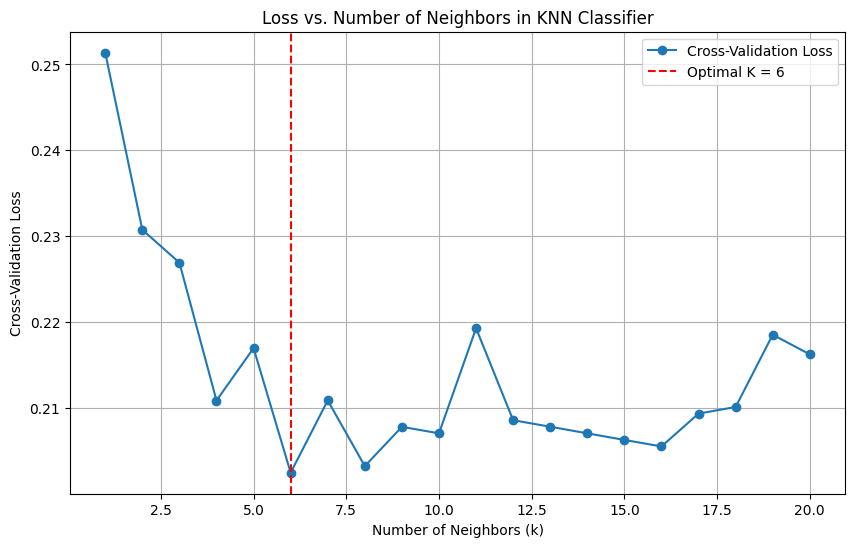

In [49]:
# Plot the Results

peaceplt.figure(figsize=(10, 6))
peaceplt.plot(k_values, losses, marker='o', label='Cross-Validation Loss')
peaceplt.axvline(x=optimal_k, color='red', linestyle='--', label=f'Optimal K = {optimal_k}')
peaceplt.xlabel('Number of Neighbors (k)')
peaceplt.ylabel('Cross-Validation Loss')
peaceplt.title('Loss vs. Number of Neighbors in KNN Classifier')
peaceplt.legend()
peaceplt.grid(True)
peaceplt.show()

Step 4 - Evaluation of the Performance of KNN using 3 different distance metrics

In [51]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_np)

In [58]:
# Define a function to evaluate KNN with different metrics

def evaluate_knn_with_metrics(X_scaled, y, metric, k=5):
    knn_model = KNeighborsClassifier(n_neighbors=k, metric=metric)
    accuracy_scores = cross_val_score(knn_model, X_scaled, y, cv=5, scoring='accuracy')
    return accuracy_scores.mean(), 1 - accuracy_scores.mean()

# Custom Mahalanobis distance
def mahalanobis_distance(X_train):
    cov_matrix = peacenp.cov(X_train.T)
    inv_cov_matrix = inv(cov_matrix)
    return lambda u, v: mahalanobis(u, v, inv_cov_matrix)

# Evaluate with 3 distance metrics
metrics = ['euclidean', 'chebyshev', 'hamming']
results = {}

for metric in metrics:
    accuracy, error = evaluate_knn_with_metrics(X_scaled, y_np, metric, k=optimal_k)
    results[metric] = {'accuracy': accuracy, 'error': error}

# Add Mahalanobis distance (custom)
mahalanobis_func = mahalanobis_distance(X_scaled)
knn_mahalanobis = KNeighborsClassifier(n_neighbors=optimal_k, metric=mahalanobis_func)
mahalanobis_scores = cross_val_score(knn_mahalanobis, X_scaled, y_np, cv=5, scoring='accuracy')
results['mahalanobis'] = {
    'accuracy': mahalanobis_scores.mean(),
    'error': 1 - mahalanobis_scores.mean(),
}

# Display Results
import pandas as pd
results_df = pd.DataFrame(results).T
results_df.columns = ['Accuracy', 'Error']
print(results_df)

             Accuracy     Error
euclidean    0.656986  0.343014
chebyshev    0.659282  0.340718
hamming      0.644728  0.355272
mahalanobis  0.666149  0.333851


Step 5: Compare the Best KNN Model with Logistic Regression

In [61]:
# Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000)
log_reg_cross_val = cross_val_score(log_reg, X_np, y_np, cv=5, scoring='accuracy')
log_reg_accuracy = log_reg_cross_val.mean()
log_reg_error = 1 - log_reg_accuracy

print(f"Logistic Regression Cross-Validation Accuracy: {log_reg_accuracy:.4f}")
print(f"Logistic Regression Cross-Validation Error: {log_reg_error:.4f}")

Logistic Regression Cross-Validation Accuracy: 0.7028
Logistic Regression Cross-Validation Error: 0.2972


# **QUESTION 4 - WINE QUALITY REGRESSION**

Step 1: Read the Red and White Wine

In [64]:
df_red_wine = peacepd.read_csv('winequality-red.csv', sep=';')
df_red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [65]:
df_white_wine = peacepd.read_csv('winequality-white.csv', sep=';')
df_white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Step 2: Calculate the Average of Each Feature

In [68]:
# Compute the averages

red_wine_avg = df_red_wine.mean()
white_wine_avg = df_white_wine.mean()

print(f"Red Wine Averages:\n{red_wine_avg}")
print(f"\nWhite Wine Averages:\n{white_wine_avg}")

Red Wine Averages:
fixed acidity            8.319637
volatile acidity         0.527821
citric acid              0.270976
residual sugar           2.538806
chlorides                0.087467
free sulfur dioxide     15.874922
total sulfur dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
quality                  5.636023
dtype: float64

White Wine Averages:
fixed acidity             6.854788
volatile acidity          0.278241
citric acid               0.334192
residual sugar            6.391415
chlorides                 0.045772
free sulfur dioxide      35.308085
total sulfur dioxide    138.360657
density                   0.994027
pH                        3.188267
sulphates                 0.489847
alcohol                  10.514267
quality                   5.877909
dtype: float64


In [69]:
df_wine_averages = peacepd.DataFrame({
    'Red Wine': red_wine_avg,
    'White Wine': white_wine_avg
}).drop('quality')

df_wine_averages

,Red Wine,White Wine
fixed acidity,8.319637,6.854788
volatile acidity,0.527821,0.278241
citric acid,0.270976,0.334192
residual sugar,2.538806,6.391415
chlorides,0.087467,0.045772
free sulfur dioxide,15.874922,35.308085
total sulfur dioxide,46.467792,138.360657
density,0.996747,0.994027
pH,3.311113,3.188267
sulphates,0.658149,0.489847


<Figure size 2000x1200 with 0 Axes>

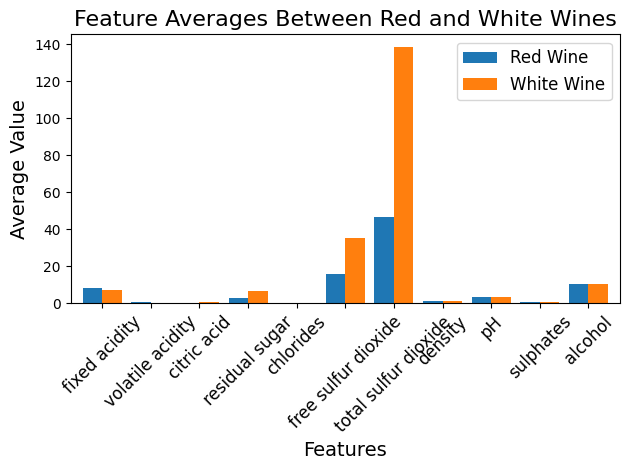

In [72]:

# Plot bar graph
peaceplt.figure(figsize=(20, 12))
df_wine_averages.plot(kind='bar', width=0.8)
peaceplt.title('Feature Averages Between Red and White Wines', fontsize=16)
peaceplt.ylabel('Average Value', fontsize=14)
peaceplt.xlabel('Features', fontsize=14)
peaceplt.xticks(rotation=45, fontsize=12)
peaceplt.legend(fontsize=12)
peaceplt.tight_layout()
peaceplt.show()

In [73]:
# Calculate correlations with quality

red_corr = df_red_wine.corr()['quality'].drop('quality')
white_corr = df_white_wine.corr()['quality'].drop('quality')

# Identify most relevant features

most_relevant_red = red_corr.abs().idxmax()
most_relevant_white = white_corr.abs().idxmax()


# Display results

print("Red Wine Correlations with Quality:")
print(red_corr)
print(f"Most relevant feature for red wine: {most_relevant_red} (Correlation: {red_corr[most_relevant_red]:.2f})\n")

print("White Wine Correlations with Quality:")
print(white_corr)
print(f"Most relevant feature for white wine: {most_relevant_white} (Correlation: {white_corr[most_relevant_white]:.2f})\n")


Red Wine Correlations with Quality:
fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64
Most relevant feature for red wine: alcohol (Correlation: 0.48)

White Wine Correlations with Quality:
fixed acidity          -0.113663
volatile acidity       -0.194723
citric acid            -0.009209
residual sugar         -0.097577
chlorides              -0.209934
free sulfur dioxide     0.008158
total sulfur dioxide   -0.174737
density                -0.307123
pH                      0.099427
sulphates               0.053678
alcohol                 0.435575
Name: quality, dtype: float64
Most relevant feature for white wine: alcohol (Correlation: 0.44)



In [80]:
# Prepare data for Lasso regression

def data_prep(df_data):
    X = df_data.drop(columns=['quality'])
    y = df_data['quality']
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled, y

X_red, y_red = data_prep(df_red_wine)
X_white, y_white = data_prep(df_white_wine)

# Lasso regression with cross-validation
lasso_red_wine = LassoCV(cv=5, random_state=42).fit(X_red, y_red)
lasso_white_wine = LassoCV(cv=5, random_state=42).fit(X_white, y_white)

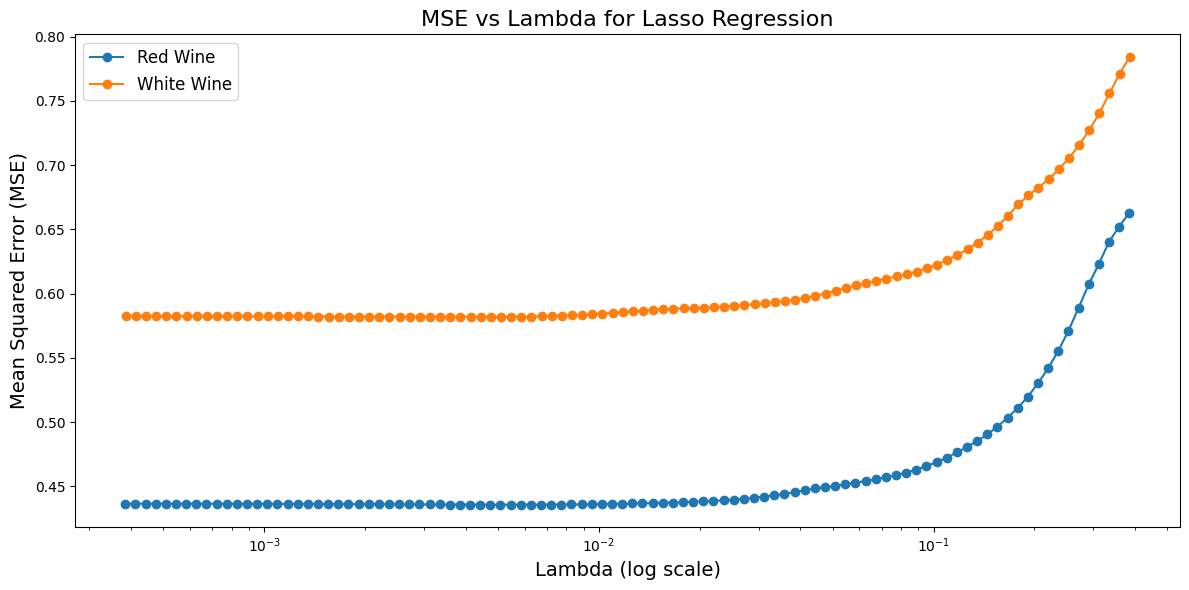

In [81]:
# Plot MSE vs Lambda

peaceplt.figure(figsize=(12, 6))
peaceplt.plot(lasso_red_wine.alphas_, lasso_red_wine.mse_path_.mean(axis=1), label='Red Wine', marker='o')
peaceplt.plot(lasso_white_wine.alphas_, lasso_white_wine.mse_path_.mean(axis=1), label='White Wine', marker='o')
peaceplt.xscale('log')
peaceplt.xlabel('Lambda (log scale)', fontsize=14)
peaceplt.ylabel('Mean Squared Error (MSE)', fontsize=14)
peaceplt.title('MSE vs Lambda for Lasso Regression', fontsize=16)
peaceplt.legend(fontsize=12)
peaceplt.tight_layout()
peaceplt.show()


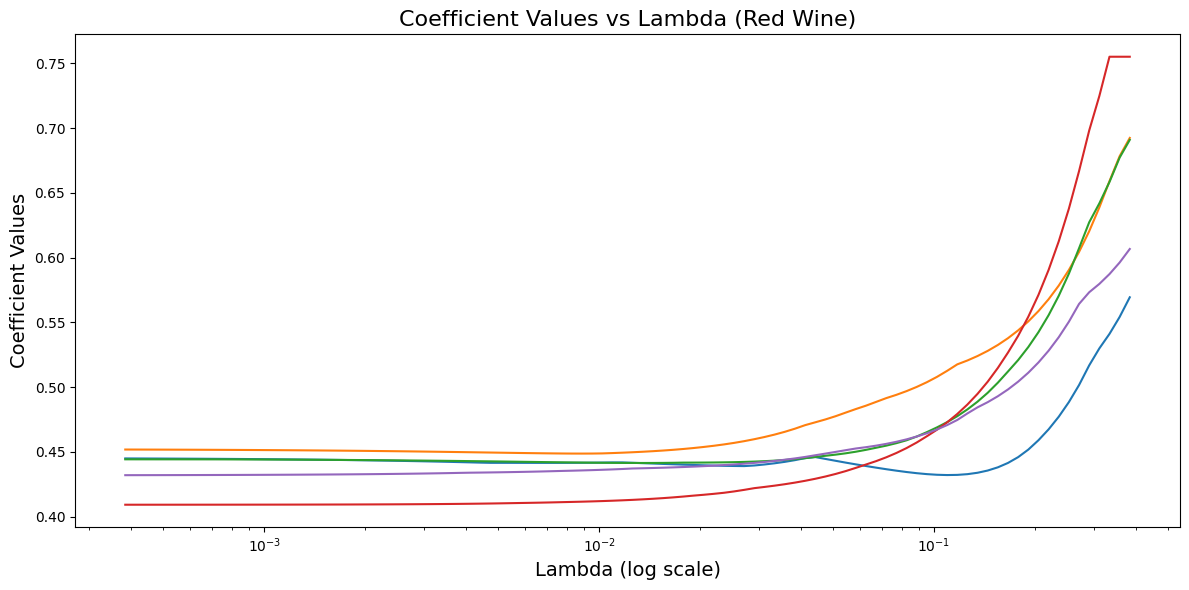

In [82]:
# Plot coefficients vs Lambda

peaceplt.figure(figsize=(12, 6))
for i, coef_path in enumerate(lasso_red_wine.mse_path_.T):
    peaceplt.plot(lasso_red_wine.alphas_, coef_path, label=f'Feature {i+1}')
peaceplt.xscale('log')
peaceplt.xlabel('Lambda (log scale)', fontsize=14)
peaceplt.ylabel('Coefficient Values', fontsize=14)
peaceplt.title('Coefficient Values vs Lambda (Red Wine)', fontsize=16)
peaceplt.tight_layout()
peaceplt.show()

In [86]:
# Extract the optimal alpha (regularization parameter)

alpha_red = lasso_red_wine.alpha_
alpha_white = lasso_white_wine.alpha_

# Ensure X_red and X_white are DataFrames
X_red = pd.DataFrame(X_red, columns=df_red_wine.columns[:-1])
X_white = pd.DataFrame(X_white, columns=df_white_wine.columns[:-1])

# Selected features based on non-zero coefficients
selected_features_red = pd.Series(lasso_red_wine.coef_, index=X_red.columns)[lasso_red_wine.coef_ != 0].index.tolist()
selected_features_white = pd.Series(lasso_white_wine.coef_, index=X_white.columns)[lasso_white_wine.coef_ != 0].index.tolist()

print("Selected features for red wine:", selected_features_red)
print("Selected features for white wine:", selected_features_white)

Selected features for red wine: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'pH', 'sulphates', 'alcohol']
Selected features for white wine: ['volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [87]:
# Prepare data with selected features
X_red_selected = df_red_wine[selected_features_red]
X_train, X_test, y_train, y_test = train_test_split(X_red_selected, y_red, test_size=0.3, random_state=42)

# Train KNN regression model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Evaluate KNN performance
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print(f"KNN Model - MSE: {mse_knn:.4f}, R^2: {r2_knn:.4f}")

KNN Model - MSE: 0.5291, R^2: 0.1655


In [89]:
# Train Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Evaluate Linear Regression performance
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression - MSE: {mse_lr:.4f}, R^2: {r2_lr:.4f}")

Linear Regression - MSE: 0.4115, R^2: 0.3509


In [90]:
print("Model Comparison:")
print(f"KNN Regression - MSE: {mse_knn:.4f}, R^2: {r2_knn:.4f}")
print(f"Linear Regression - MSE: {mse_lr:.4f}, R^2: {r2_lr:.4f}")

Model Comparison:
KNN Regression - MSE: 0.5291, R^2: 0.1655
Linear Regression - MSE: 0.4115, R^2: 0.3509
